In [20]:
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD,adam
import keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()
def P_label(folder):
    global labels ,labels_hot ,dict_labels
    label = os.path.basename(folders)
    if folder.endswith('Pwave'):
        for i in range(0,len(images)):
            className = np.asarray(label)
            #print(className)
            labels.append(className)
            labels_hot.append(dict_labels[label])
    if folder.endswith('Noise'):
        for i in range(0,len(noise)):
            className = np.asarray(label)
            #print(className)
            labels.append(className)
            labels_hot.append(dict_labels[label])            

In [21]:
(train_data,train_label),(test_data,test_label) = mnist.load_data()

In [22]:
import numpy as np
train_data = train_data.reshape(len(train_data),784)
test_data = test_data.reshape(len(test_data),784)
print(train_data.shape,test_data.shape)

(60000, 784) (10000, 784)


In [23]:
trainlabel = to_categorical(train_label,10)
print(trainlabel.shape)
testlabel = to_categorical(test_label,10)
print(testlabel.shape)

(60000, 10)
(10000, 10)


## 如何不改變模型權重？

## Function API

In [24]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate,add

In [55]:
x = Input(shape=(784,))

## 設定不同的 Activation Function

In [64]:
f_1 = Dense(100,activation='relu',kernel_initializer='random_uniform')
f_2 = Dense(100,activation='relu',kernel_initializer='random_uniform')
f_3 = Dense(100,activation='relu',kernel_initializer='random_uniform')
f_4 = Dense(100,activation='relu',kernel_initializer='random_uniform')
f_5 = Dense(100,activation='relu',kernel_initializer='random_uniform')
f_6 = Dense(100,activation='relu',kernel_initializer='random_uniform')
f_7 = Dense(100,activation='relu',kernel_initializer='random_uniform')
f_8 = Dense(100,activation='relu',kernel_initializer='random_uniform')
f_9 = Dense(100,activation='relu',kernel_initializer='random_uniform')
f_10 = Dense(100,activation='relu',kernel_initializer='random_uniform')
f_11 = Dense(100,activation='relu',kernel_initializer='random_uniform')
f_12 = Dense(10,activation='softmax')

In [65]:
h_1 = f_1(x)
h_2 = f_2(h_1)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
h_5 = f_5(h_1)

u_1 = concatenate([h_2,h_3])
u_2 = concatenate([h_2,h_4])
u_3 = concatenate([h_2,h_5])
v_1 = concatenate([h_3,h_4])
v_2 = concatenate([h_3,h_5])
w_1 = concatenate([h_4,h_5])

h_6 = f_6(u_1)
h_7 = f_7(u_2)
h_8 = f_8(u_3)
h_9 = f_9(v_1)
h_10 = f_10(v_2)
h_11 = f_11(w_1)

all_1 = concatenate([h_6,h_7,h_8,h_9,h_10,h_11])
y = f_12(all_1)

In [66]:
model = Model(x,y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_91 (Dense)                (None, 100)          78500       input_3[0][0]                    
__________________________________________________________________________________________________
dense_92 (Dense)                (None, 100)          10100       dense_91[0][0]                   
__________________________________________________________________________________________________
dense_93 (Dense)                (None, 100)          10100       dense_91[0][0]                   
__________________________________________________________________________________________________
dense_94 (

In [67]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [68]:
train_history = model.fit(train_data,trainlabel,batch_size=128,epochs=20,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 55us/step - loss: 0.3389 - acc: 0.9044 - val_loss: 0.1764 - val_acc: 0.9487
Epoch 2/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.1302 - acc: 0.9607 - val_loss: 0.1589 - val_acc: 0.9543
Epoch 3/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.1010 - acc: 0.9684 - val_loss: 0.1273 - val_acc: 0.9628
Epoch 4/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.0773 - acc: 0.9758 - val_loss: 0.1422 - val_acc: 0.9604
Epoch 5/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.0740 - acc: 0.9777 - val_loss: 0.1255 - val_acc: 0.9692
Epoch 6/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.0596 - acc: 0.9815 - val_loss: 0.1583 - val_acc: 0.9603
Epoch 7/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.0619 - acc: 0.9807 - val_loss: 0.1184 - val_acc

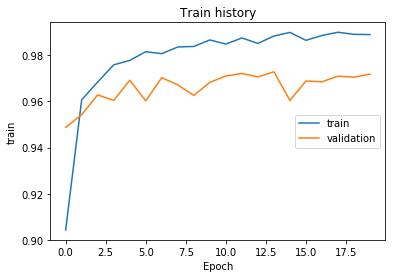

In [69]:
show_train_history(train_history,'acc','val_acc')

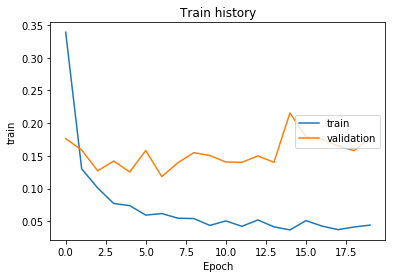

In [70]:
show_train_history(train_history,'loss','val_loss')

In [71]:
scores_test = model.evaluate(test_data,testlabel)
print(scores_test[1])
scores_train = model.evaluate(train_data,trainlabel)
print(scores_train[1])

10000/10000 [==============================] - 0s 30us/step
0.9725
60000/60000 [==============================] - 2s 31us/step
0.98765
